In [133]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import csv 
import os

In [134]:
df = pd.read_csv("Train.csv")

In [135]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [136]:
#survived = df['Survived']

print("Total" , len(df))
print("Number of passengers survived = ", len(df[df['Survived']==1]))
print("Number of passengers who did NOT survived = ", len(df[df['Survived']==0]))

Survived = len(df[df['Survived']==1])
Not_survived = len(df[df['Survived']==0])

print('% Survived = ', 1. *Survived / len(df)*100)
print('% NOT Survived = ', 1. *Not_survived / len(df)*100)


Total 891
Number of passengers survived =  342
Number of passengers who did NOT survived =  549
% Survived =  38.38383838383838
% NOT Survived =  61.61616161616161


In [137]:
print('% Survived = ', 1. *Survived / len(df)*100)
print('% NOT Survived = ', 1. *Not_survived / len(df)*100)

% Survived =  38.38383838383838
% NOT Survived =  61.61616161616161


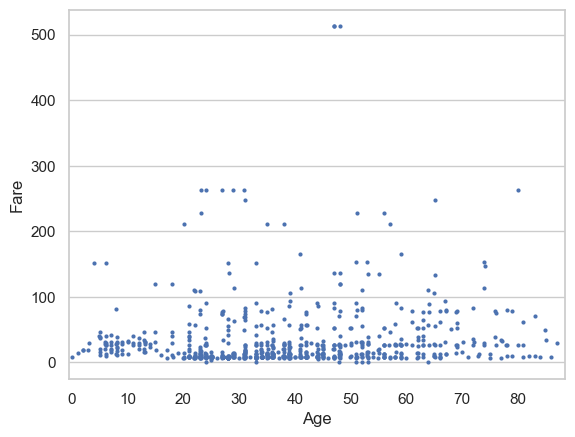

In [138]:
sns.set(style = 'whitegrid')

##fig, ax = plt.subplots(figsize = (19,50))

sns.stripplot(x = "Age" , y = "Fare", data = df, size = 3, jitter = True)
tick_pos = range(0,90,10)


tick_labels = [str(i) for i in tick_pos]
plt.xticks(tick_pos, tick_labels)

plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

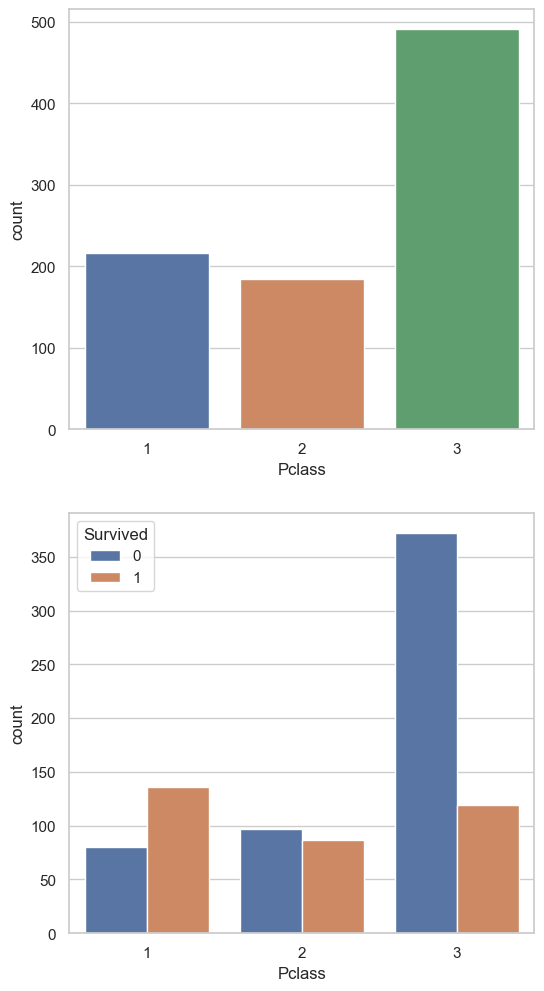

In [139]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x = 'Pclass', data = df)
plt.subplot(212)
sns.countplot(x = 'Pclass', hue= 'Survived', data = df)

<Axes: xlabel='SibSp', ylabel='count'>

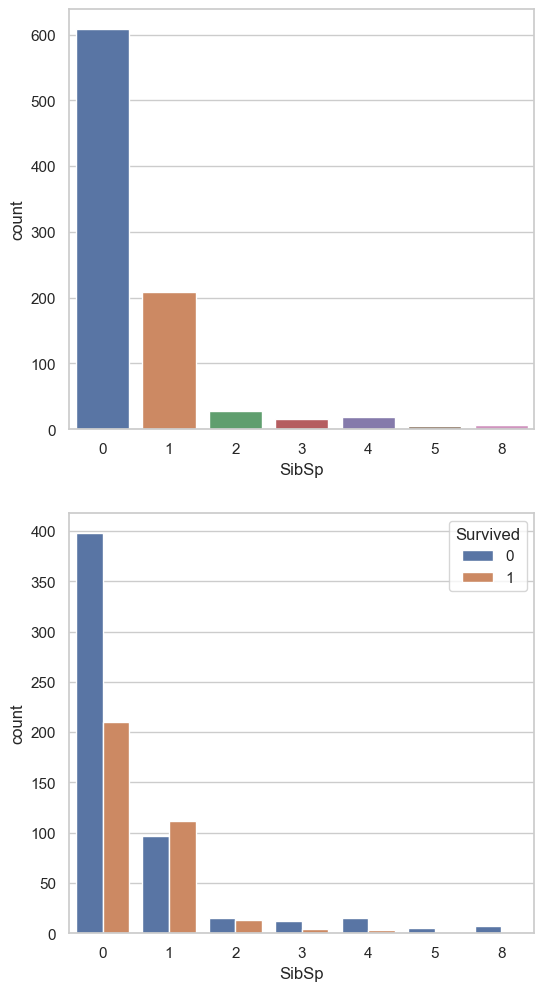

In [140]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x = 'SibSp', data = df)
plt.subplot(212)
sns.countplot(x = 'SibSp', hue= 'Survived', data = df)

<Axes: xlabel='Parch', ylabel='count'>

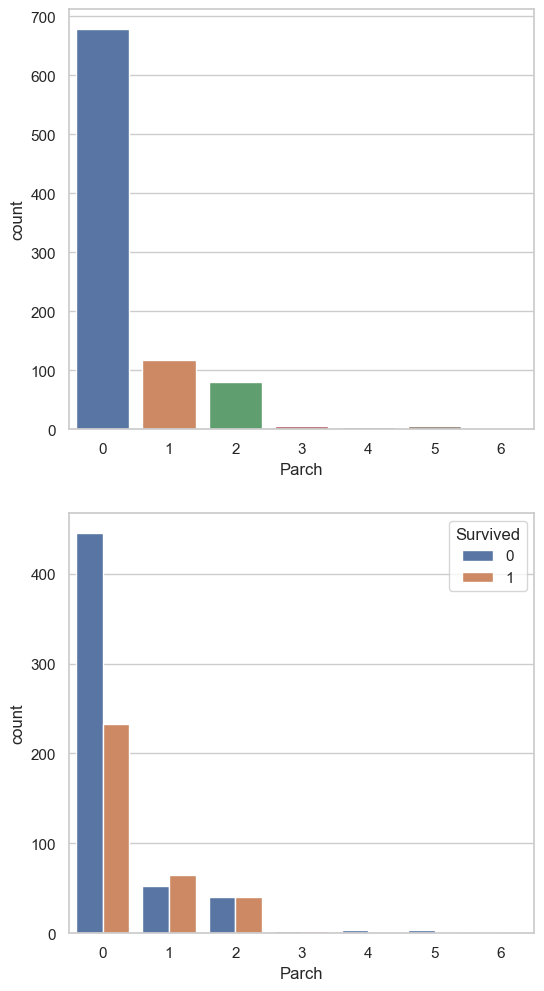

In [141]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x = 'Parch', data = df)
plt.subplot(212)
sns.countplot(x = 'Parch', hue= 'Survived', data = df)

<Axes: xlabel='Embarked', ylabel='count'>

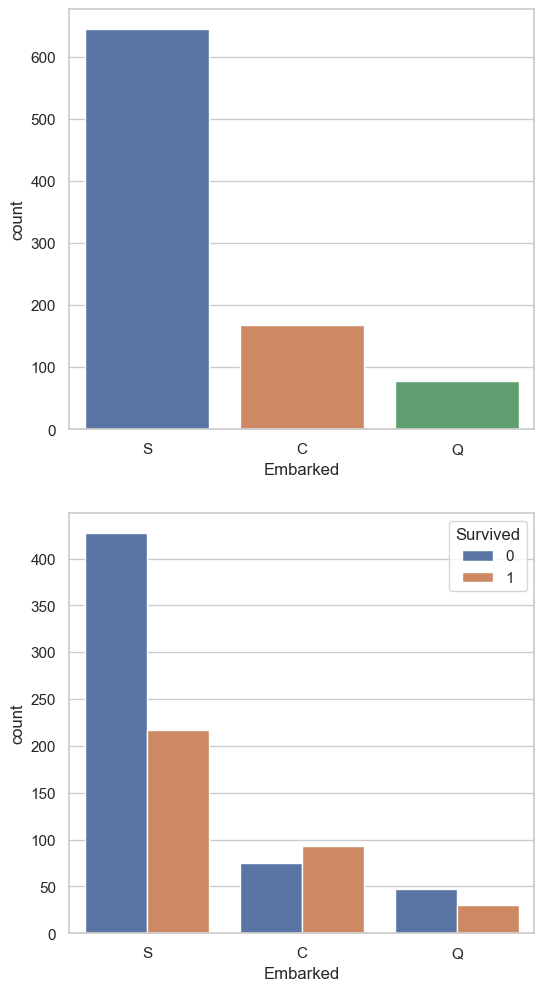

In [142]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x = 'Embarked', data = df)
plt.subplot(212)
sns.countplot(x = 'Embarked', hue= 'Survived', data = df)

<Axes: xlabel='Sex', ylabel='count'>

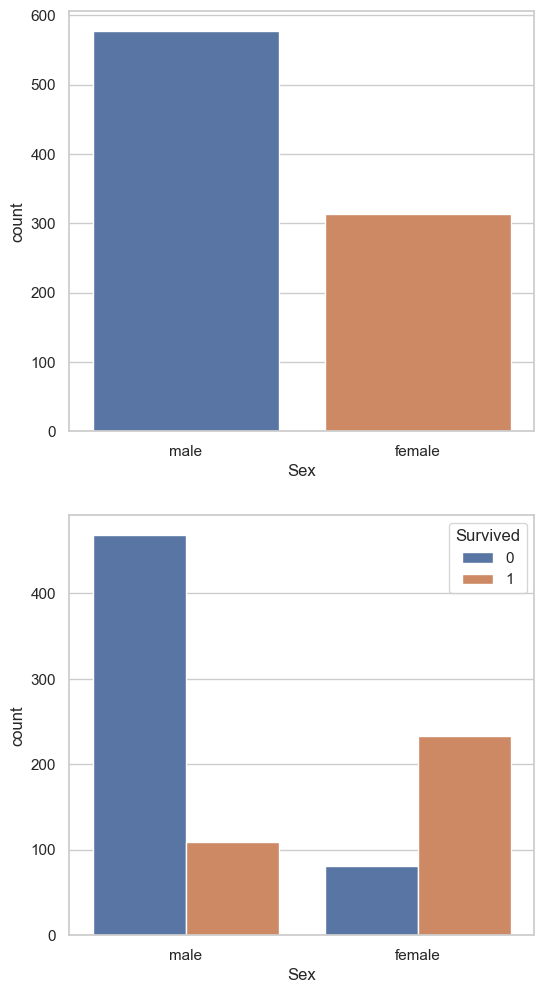

In [143]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x = 'Sex', data = df)
plt.subplot(212)
sns.countplot(x = 'Sex', hue= 'Survived', data = df)

<Axes: xlabel='Age', ylabel='count'>

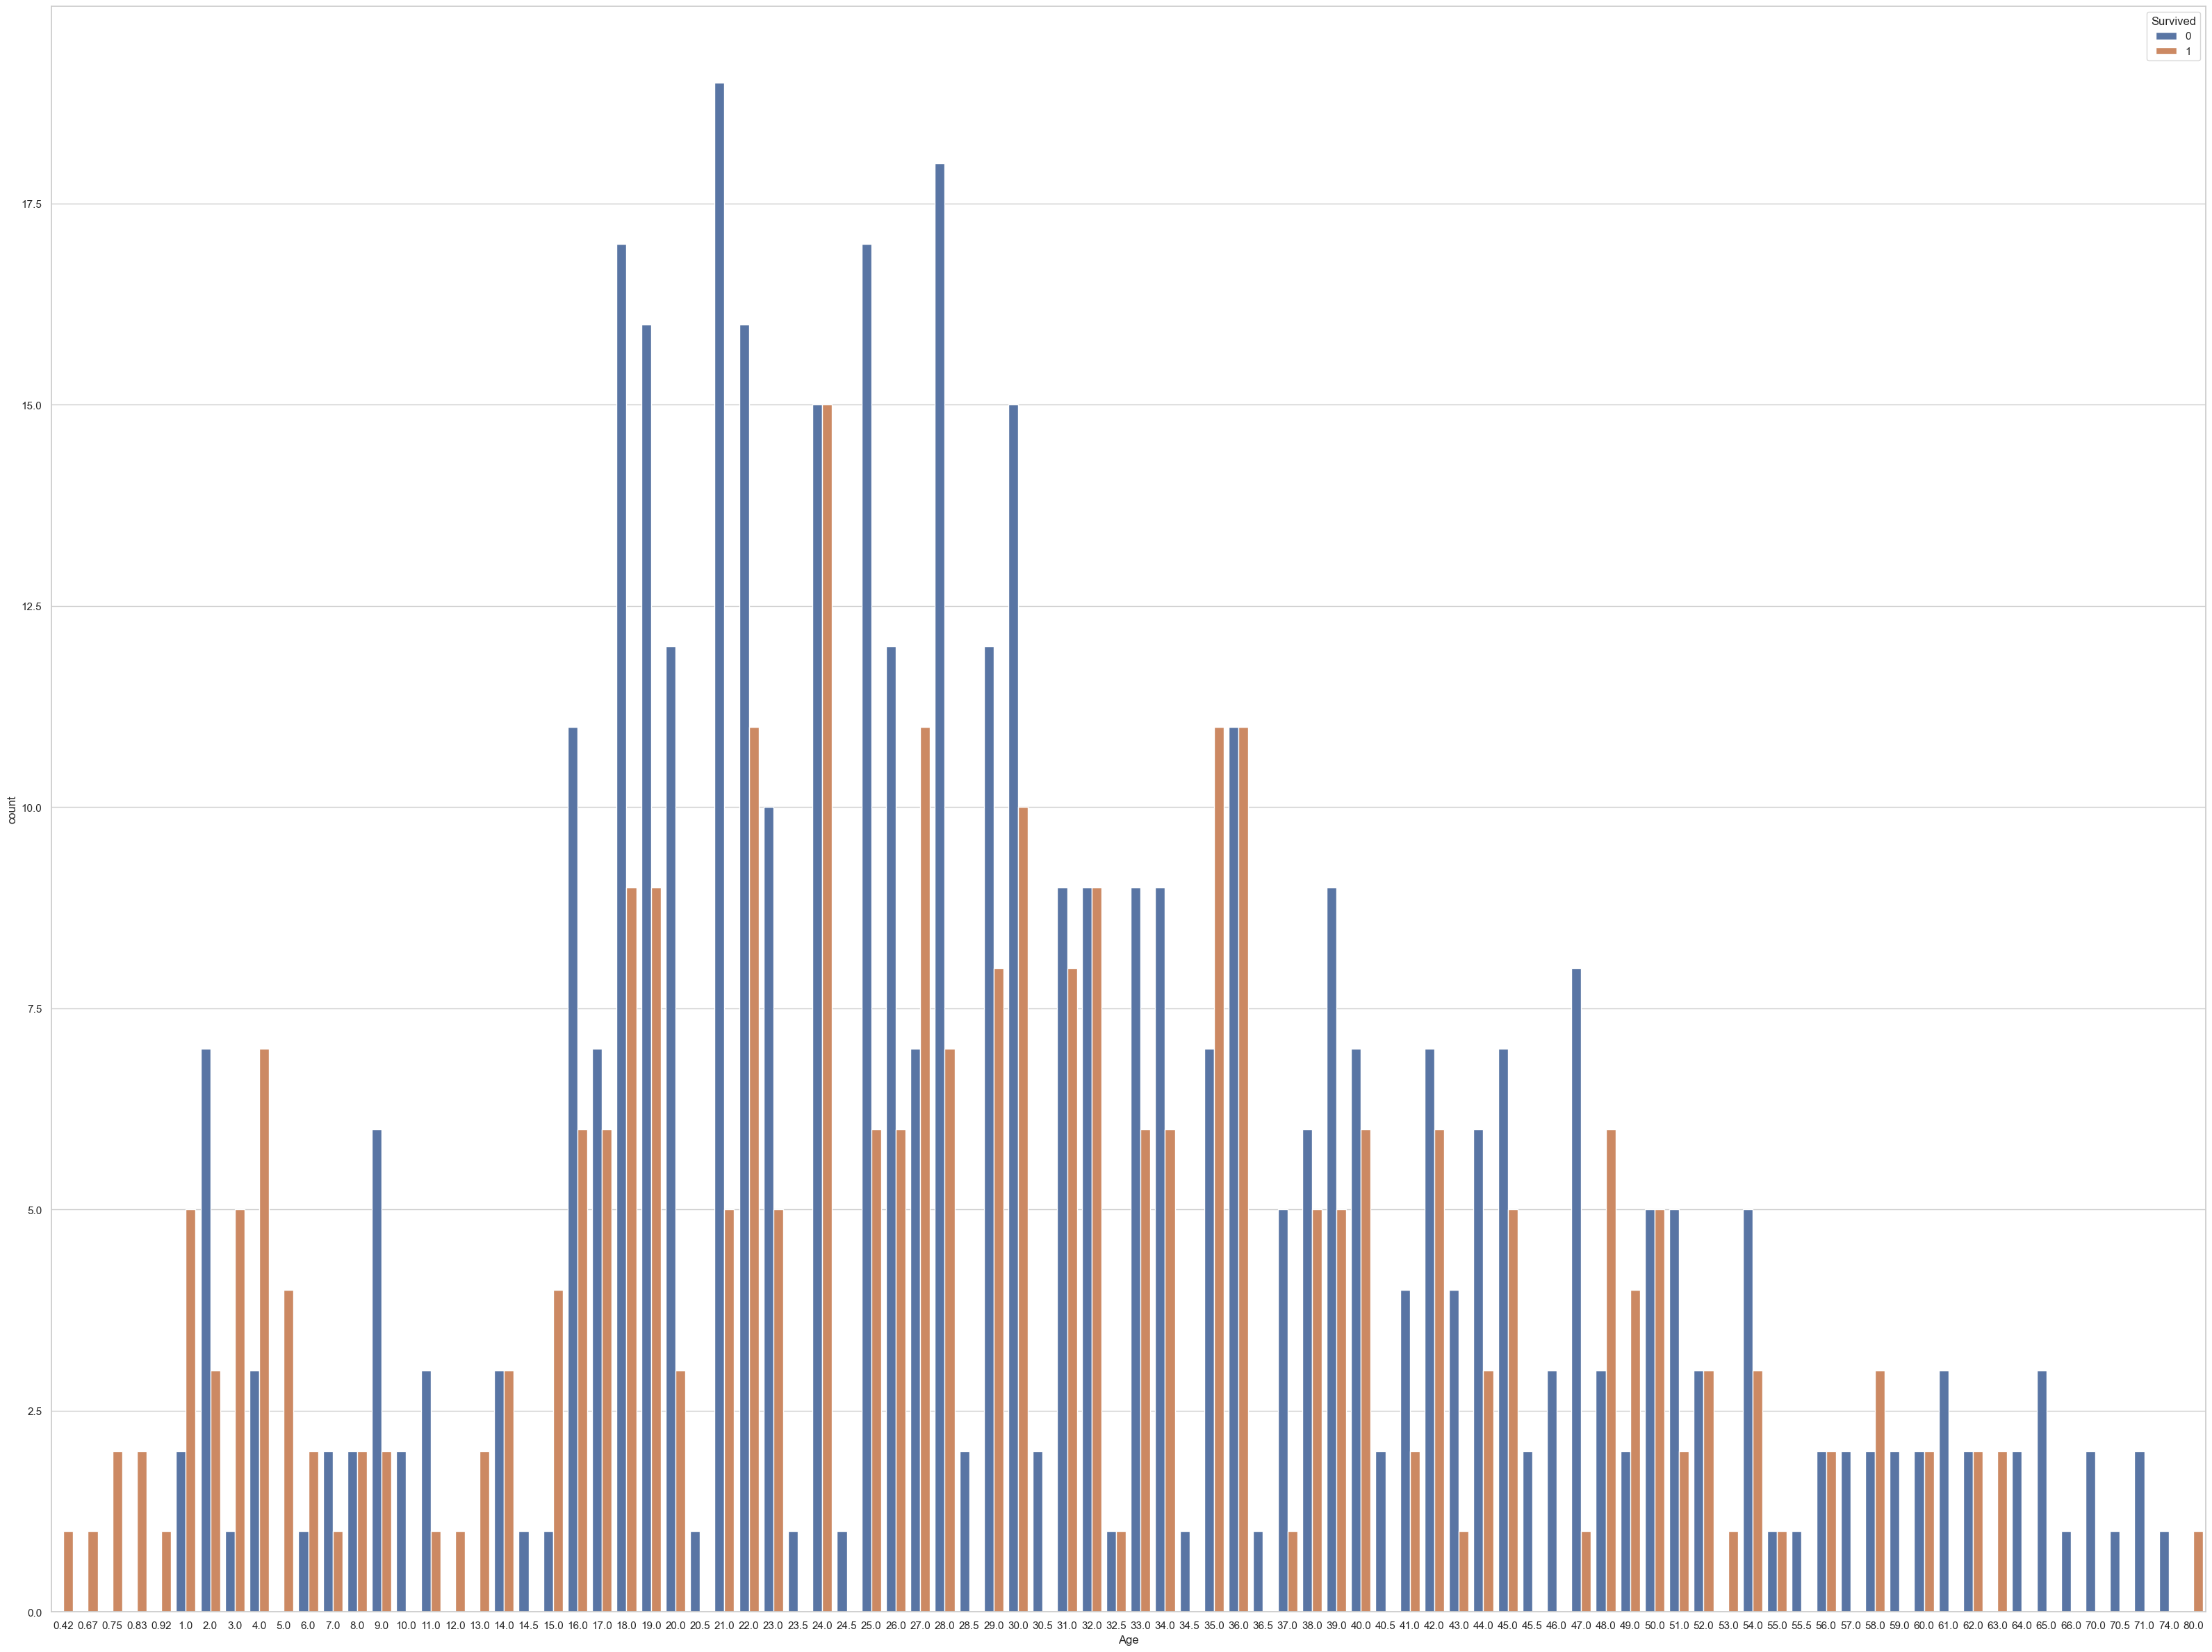

In [144]:
plt.figure(figsize = (40,30))
sns.countplot(x = 'Age', hue = 'Survived', data = df)

<Axes: >

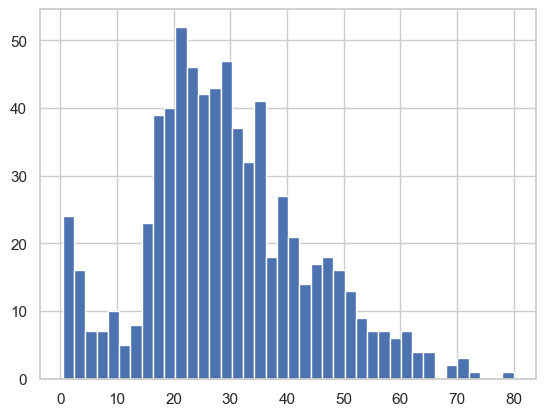

In [145]:
df['Age'].hist(bins = 40)

<Axes: >

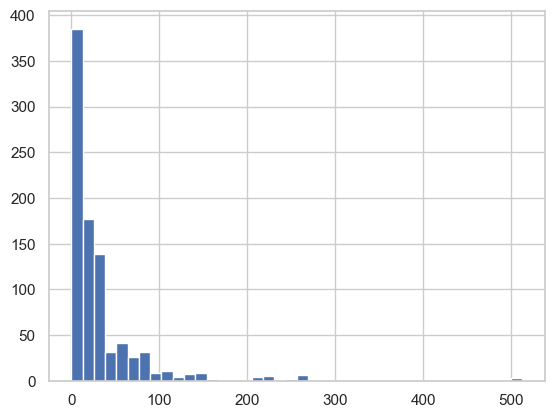

In [146]:
df['Fare'].hist(bins = 40)

<Axes: xlabel='Fare', ylabel='count'>

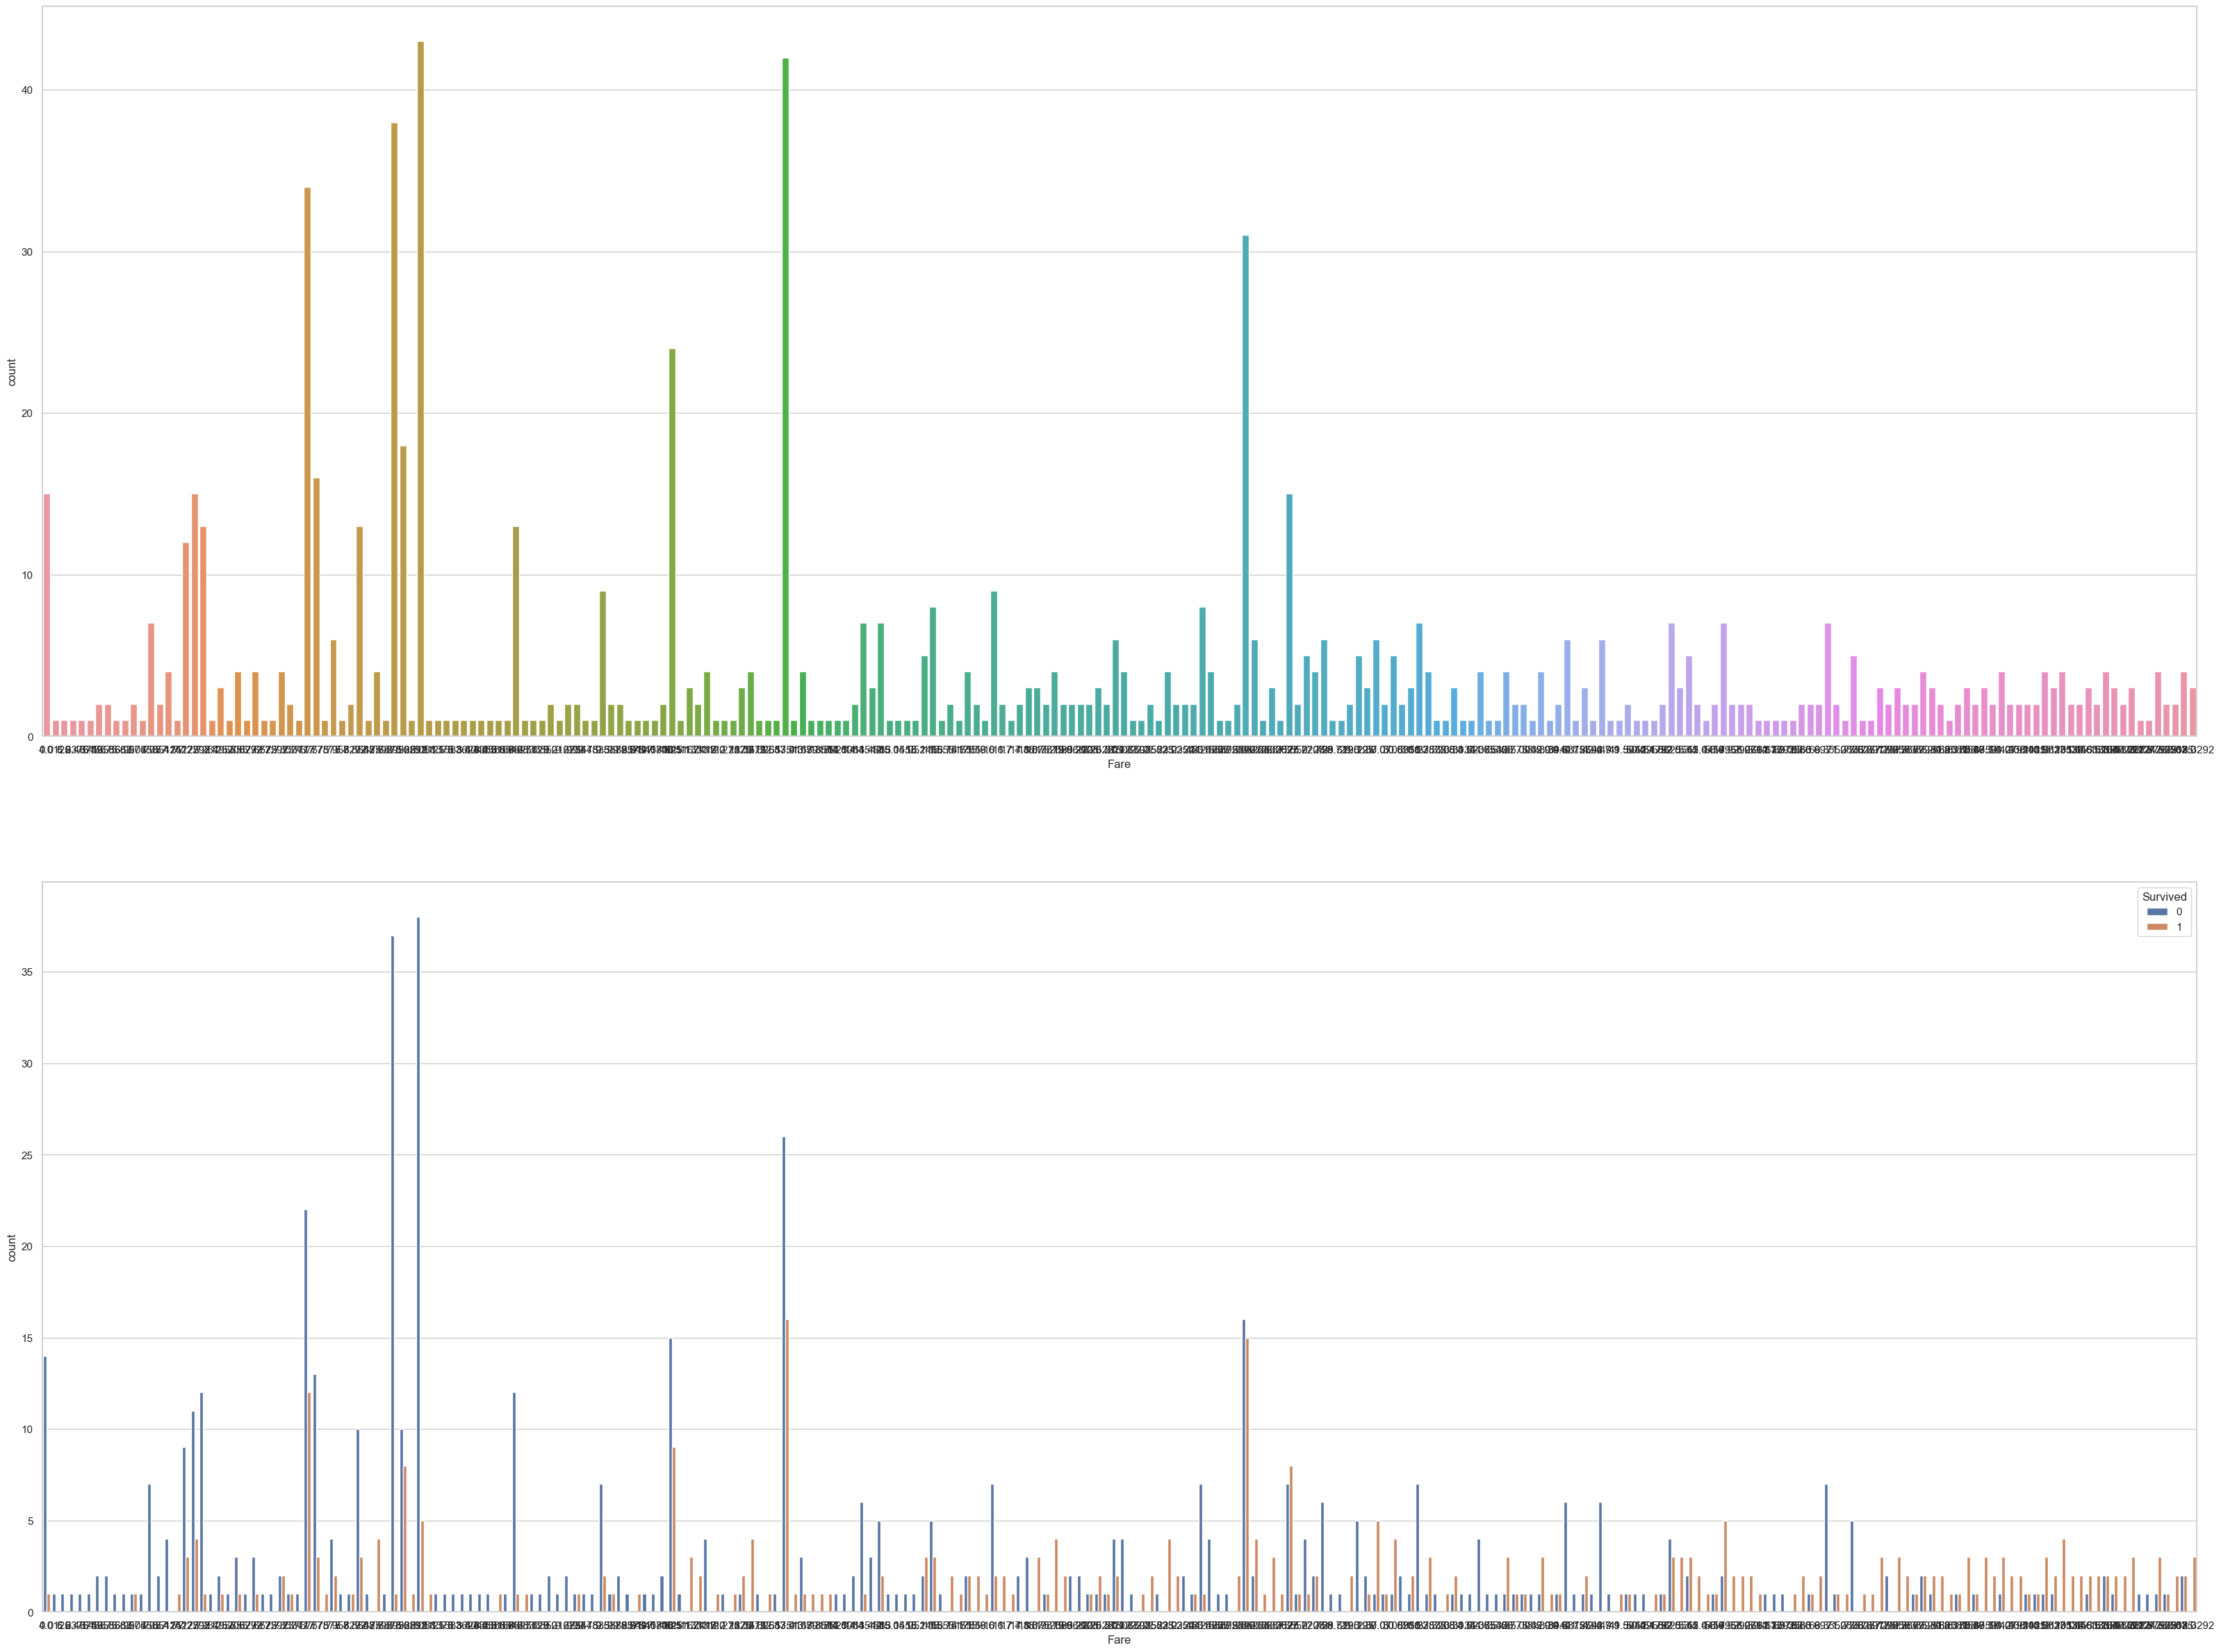

In [147]:
plt.figure(figsize = [40,30])
plt.subplot(211)
sns.countplot(x = 'Fare', data = df)
plt.subplot(212)
sns.countplot(x = 'Fare', hue= 'Survived', data = df)

In [148]:
##Do some data analysis, for finding the ratio of those who spent more money on the fare
## vs who didnt, what portion/ratio survived and who didnt survive.

In [149]:
#Data cleaning portion for training our model
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [150]:
df.drop(['Name','Ticket','Embarked','PassengerId','Cabin'], axis =1, inplace = True) 
#We've droped the following columns Name, Ticket, Embarked, PassengerId, Cabin.


<Axes: >

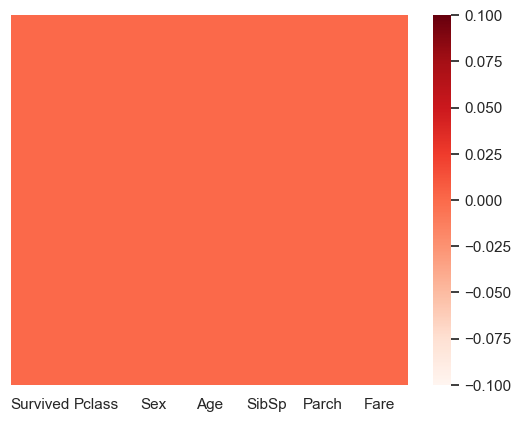

In [154]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = True, cmap = "Reds")
#missing info(NAN)

<Axes: xlabel='Sex', ylabel='Age'>

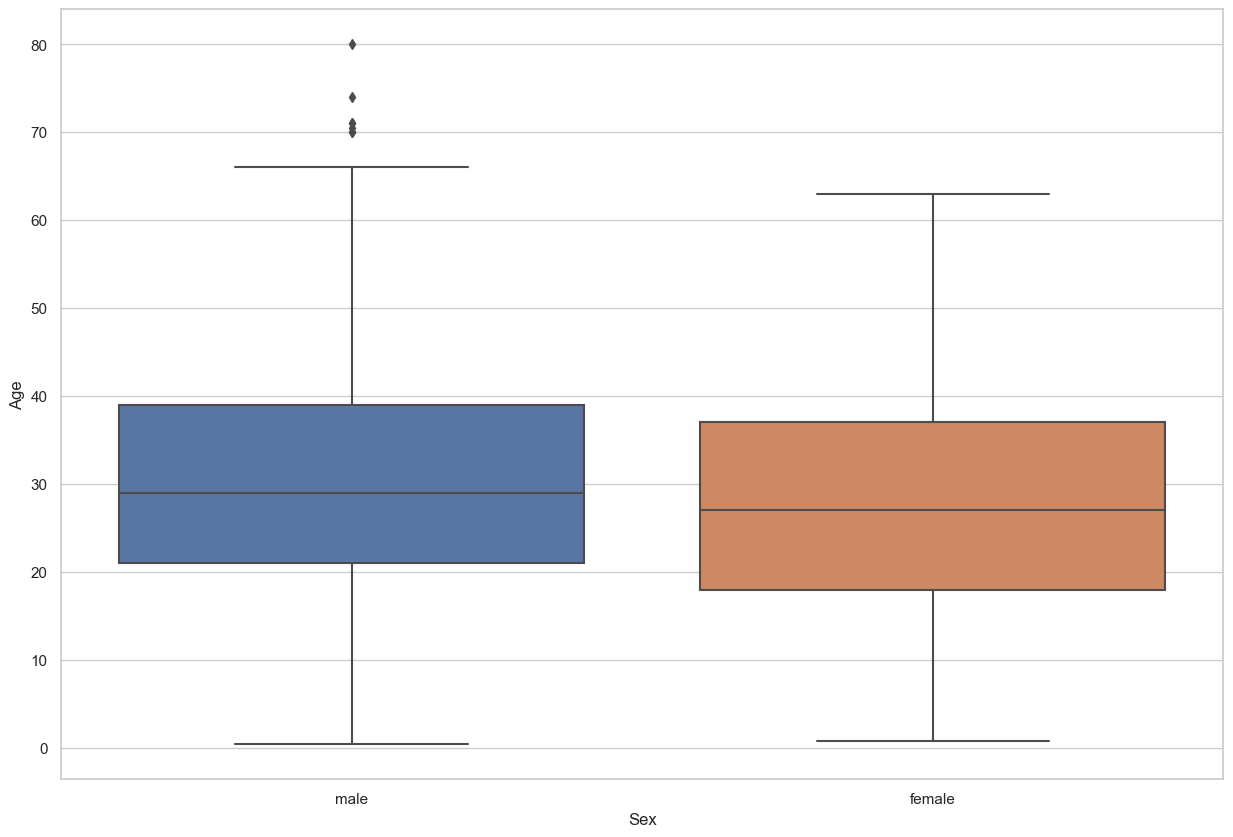

In [152]:
plt.figure(figsize = [15,10])
sns.boxplot(x ='Sex', y = 'Age', data = df)

In [153]:
def Fill_age(data):
    age = data[0]
    sex = data[1]
    
    if pd.isnull(age):
        if sex is 'male':
            return 29
        else:
            return 25
    else:
        return age
df['Age'] = df[['Age', 'Sex']].apply(Fill_age,axis =1)
df


<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\owner\AppData\Local\Temp\ipykernel_6796\1215882443.py:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if sex is 'male':


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,25.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


<Axes: >

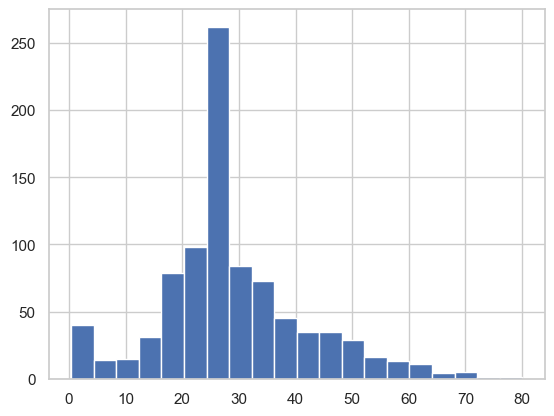

In [155]:
df['Age'].hist(bins = 20)

In [156]:
male = pd.get_dummies(df['Sex'], drop_first = True)
male

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [158]:
df.drop(['Sex'], axis = 1, inplace = True)

In [166]:
df = pd.concat([df, male], axis =1)
df['male'] = df['male'].astype(int)
df = df.loc[:, ~df.columns.duplicated()]
print(df)

     Survived  Pclass   Age  SibSp  Parch     Fare  male
0           0       3  22.0      1      0   7.2500     1
1           1       1  38.0      1      0  71.2833     0
2           1       3  26.0      0      0   7.9250     0
3           1       1  35.0      1      0  53.1000     0
4           0       3  35.0      0      0   8.0500     1
..        ...     ...   ...    ...    ...      ...   ...
886         0       2  27.0      0      0  13.0000     1
887         1       1  19.0      0      0  30.0000     0
888         0       3  25.0      1      2  23.4500     0
889         1       1  26.0      0      0  30.0000     1
890         0       3  32.0      0      0   7.7500     1

[891 rows x 7 columns]


In [169]:
X = df.drop(['Survived'],  axis =1).values

In [172]:
Y = df['Survived'].values

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =.2, random_state = 10)

In [185]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [186]:
Y_predict = classifier.predict(X_test) ##Model prediction based on data

<Axes: >

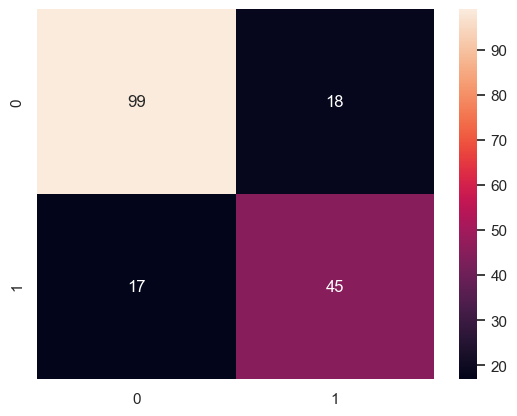

In [187]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predict)
sns.heatmap(cm, annot = True, fmt = 'd')

In [189]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict)) ##81 percent classifcation rate given data 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179

